In [20]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [21]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


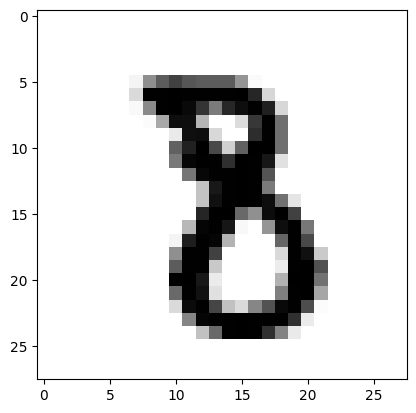

In [22]:
dataiter= iter(trainloader)
for imagens, etiquetas in trainloader:
    plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')

In [23]:
print(imagens[0].shape) #para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) #verificar as dimensões do tensor de cada etiqueta.

torch.Size([1, 28, 28])
torch.Size([])


In [24]:
class Modelo(nn.Module):
  def __init__(self):
      super(Modelo, self).__init__()
      self.linear1 = nn.Linear(28*28, 128)
      self.linear2 = nn.Linear(128, 64)
      self.linear3 = nn.Linear(64, 10)

  def forward(self,X):
      X = F.relu(self.linear1(X))
      X = F.relu(self.linear2(X))
      X = self.linear3(X)
      return F.log_softmax(X, dim=1)


In [25]:
def treino(modelo, trainloader, device):

  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()

  criterio = nn.NLLLoss()
  EPOCHS = 10
  modelo.train()

  for epoch in range(EPOCHS):
    perda_acumulada = 0

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1)
      otimizador.zero_grad()

      output = modelo(imagens.to(device))
      perda_instantanea = criterio(output, etiquetas.to(device))

      perda_instantanea.backward()

      otimizador.step()

      perda_acumulada += perda_instantanea.item()

    print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))

  print("\nTempo de treino (em minutos) = ",(time()-inicio)/60)


In [26]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens,etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)

      with torch.no_grad():
        logps = modelo(img.to(device))


      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpu()[i]
      if(etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas += 1

  print("Total de imagens tratadas =", conta_todas)
  print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))

In [27]:
modelo = Modelo()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)